### Importing Necessary Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Loading Data 

In [2]:
data=pd.read_csv('C:\DATASCIENCE\DATASET\CSV\Expired Event Data - Sheet1.csv')

In [3]:
data

,name,start_date,end_date,website,city,country,Organizer,Unnamed: 7,Rehosted Events Reference (for 10times internal usage only)
0,AACOP Annual Training and Vendor Expo,2023-09-12,2023-09-14,https://www.azchiefsofpolice.org/2023-annual-c...,Laughlin,United States,Arizona Association of Chiefs of Police,NaN,NaN
1,THE SEA,2023-11-30,2023-12-03,https://bahariexpo.com/,Brea,United States,CORFERIAS,NaN,NaN
2,B2B Next Conference & Exhibition,2020-09-29,2020-09-30,https://www.b2bnext.net/home?utm_source=EventL...,Online,Online,"B2B Next, LLC",NaN,NaN
3,Water Connect Conference,2022-03-03,2022-03-03,https://water-connect-2022.b2match.io/,Peterborough,United Kingdom,European Commission,NaN,NaN
4,Nature Nurtures Symposium,2020-03-07,2020-03-07,https://www.baltimoresustainability.org/childr...,Baltimore,United States,Baltimore Office of Sustainability,NaN,NaN
...,...,...,...,...,...,...,...,...,...
524,International Congress of Romania Culture,2020-06-25,2020-06-27,https://www.balkan-history.com/2020/02/19/the-...,Timișoara,Romania,Balkan History Association,NaN,NaN
525,B2B Marketing Symposium & Awards,2020-04-08,2020-04-08,https://www.b2bmarketingsymposium.com/,Bengaluru,India,ASIA CONTENT NETWORK,NaN,NaN
526,Bakery Tech Expo West Africa,2020-03-22,2020-03-24,https://bakerytechexpo.com/,Lagos,Nigeria,Universal Trade Exhibitions (UTEX),NaN,NaN
527,B2B Rocks Paris,2020-09-08,2020-09-08,https://b2brocks.co/paris-2020/,Paris,France,B2B Rocks,NaN,NaN


###  Names of the columns

In [4]:
data.columns

Index(['name', 'start_date', 'end_date', 'website', 'city', 'country',
       'Organizer', 'Unnamed: 7',
       'Rehosted Events Reference (for 10times internal usage only)'],
      dtype='object')

In [5]:
data['Unnamed: 7'].value_counts()

Series([], Name: Unnamed: 7, dtype: int64)

In [6]:
data['Rehosted Events Reference (for 10times internal usage only)'].value_counts()

Series([], Name: Rehosted Events Reference (for 10times internal usage only), dtype: int64)

### Removing Unwanted Columns

In [7]:
data=data.drop(['Unnamed: 7','Rehosted Events Reference (for 10times internal usage only)'],axis=1)

In [8]:
data

,name,start_date,end_date,website,city,country,Organizer
0,AACOP Annual Training and Vendor Expo,2023-09-12,2023-09-14,https://www.azchiefsofpolice.org/2023-annual-c...,Laughlin,United States,Arizona Association of Chiefs of Police
1,THE SEA,2023-11-30,2023-12-03,https://bahariexpo.com/,Brea,United States,CORFERIAS
2,B2B Next Conference & Exhibition,2020-09-29,2020-09-30,https://www.b2bnext.net/home?utm_source=EventL...,Online,Online,"B2B Next, LLC"
3,Water Connect Conference,2022-03-03,2022-03-03,https://water-connect-2022.b2match.io/,Peterborough,United Kingdom,European Commission
4,Nature Nurtures Symposium,2020-03-07,2020-03-07,https://www.baltimoresustainability.org/childr...,Baltimore,United States,Baltimore Office of Sustainability
...,...,...,...,...,...,...,...
524,International Congress of Romania Culture,2020-06-25,2020-06-27,https://www.balkan-history.com/2020/02/19/the-...,Timișoara,Romania,Balkan History Association
525,B2B Marketing Symposium & Awards,2020-04-08,2020-04-08,https://www.b2bmarketingsymposium.com/,Bengaluru,India,ASIA CONTENT NETWORK
526,Bakery Tech Expo West Africa,2020-03-22,2020-03-24,https://bakerytechexpo.com/,Lagos,Nigeria,Universal Trade Exhibitions (UTEX)
527,B2B Rocks Paris,2020-09-08,2020-09-08,https://b2brocks.co/paris-2020/,Paris,France,B2B Rocks


### Important Informations About the Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        529 non-null    object
 1   start_date  529 non-null    object
 2   end_date    529 non-null    object
 3   website     529 non-null    object
 4   city        529 non-null    object
 5   country     529 non-null    object
 6   Organizer   529 non-null    object
dtypes: object(7)
memory usage: 29.1+ KB


### Summary Statistics of the Data

In [10]:
data.describe()

,name,start_date,end_date,website,city,country,Organizer
count,529,529,529,529,529,529,529
unique,528,381,377,528,276,60,504
top,Baby To Toddler Show,2020-11-18,2023-08-25,https://bankingproductme.com/,Online,United States,Royal Media Group
freq,2,5,5,2,71,177,4


###  Size of the Data(Number of Rows and Columns)

In [11]:
data.shape

(529, 7)

### Number of Unique values of each Column

In [12]:
data.nunique()

name          528
start_date    381
end_date      377
website       528
city          276
country        60
Organizer     504
dtype: int64

### Sum of Null Values of each Columns

In [13]:
data.isnull().sum()

name          0
start_date    0
end_date      0
website       0
city          0
country       0
Organizer     0
dtype: int64

### Sum of Duplicated Values 

In [14]:
data.duplicated().sum()

0

### Converting Date Columns to Date time Format

In [15]:
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date']=pd.to_datetime(data['end_date'])

In [16]:
data

,name,start_date,end_date,website,city,country,Organizer
0,AACOP Annual Training and Vendor Expo,2023-09-12,2023-09-14,https://www.azchiefsofpolice.org/2023-annual-c...,Laughlin,United States,Arizona Association of Chiefs of Police
1,THE SEA,2023-11-30,2023-12-03,https://bahariexpo.com/,Brea,United States,CORFERIAS
2,B2B Next Conference & Exhibition,2020-09-29,2020-09-30,https://www.b2bnext.net/home?utm_source=EventL...,Online,Online,"B2B Next, LLC"
3,Water Connect Conference,2022-03-03,2022-03-03,https://water-connect-2022.b2match.io/,Peterborough,United Kingdom,European Commission
4,Nature Nurtures Symposium,2020-03-07,2020-03-07,https://www.baltimoresustainability.org/childr...,Baltimore,United States,Baltimore Office of Sustainability
...,...,...,...,...,...,...,...
524,International Congress of Romania Culture,2020-06-25,2020-06-27,https://www.balkan-history.com/2020/02/19/the-...,Timișoara,Romania,Balkan History Association
525,B2B Marketing Symposium & Awards,2020-04-08,2020-04-08,https://www.b2bmarketingsymposium.com/,Bengaluru,India,ASIA CONTENT NETWORK
526,Bakery Tech Expo West Africa,2020-03-22,2020-03-24,https://bakerytechexpo.com/,Lagos,Nigeria,Universal Trade Exhibitions (UTEX)
527,B2B Rocks Paris,2020-09-08,2020-09-08,https://b2brocks.co/paris-2020/,Paris,France,B2B Rocks


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        529 non-null    object        
 1   start_date  529 non-null    datetime64[ns]
 2   end_date    529 non-null    datetime64[ns]
 3   website     529 non-null    object        
 4   city        529 non-null    object        
 5   country     529 non-null    object        
 6   Organizer   529 non-null    object        
dtypes: datetime64[ns](2), object(5)
memory usage: 29.1+ KB


### Extracting Day from start_date column

In [18]:
m= data['start_date'].dt.strftime('%d')

In [19]:
m

0      12
1      30
2      29
3      03
4      07
       ..
524    25
525    08
526    22
527    08
528    23
Name: start_date, Length: 529, dtype: object

### Extracting Month from start_date column

In [20]:
n= data['start_date'].dt.strftime('%m')

In [21]:
n

0      09
1      11
2      09
3      03
4      03
       ..
524    06
525    04
526    03
527    09
528    06
Name: start_date, Length: 529, dtype: object

### Extracting Year from start_date column

In [22]:
o= data['start_date'].dt.strftime('%Y')

In [23]:
o

0      2023
1      2023
2      2020
3      2022
4      2020
       ... 
524    2020
525    2020
526    2020
527    2020
528    2020
Name: start_date, Length: 529, dtype: object

###  Concatenating Dataframes into New DataFrame Data1

In [24]:
data1=pd.concat([data,m,n,o],axis=1)

In [25]:
data1

,name,start_date,end_date,website,city,country,Organizer,start_date,start_date,start_date
0,AACOP Annual Training and Vendor Expo,2023-09-12,2023-09-14,https://www.azchiefsofpolice.org/2023-annual-c...,Laughlin,United States,Arizona Association of Chiefs of Police,12,09,2023
1,THE SEA,2023-11-30,2023-12-03,https://bahariexpo.com/,Brea,United States,CORFERIAS,30,11,2023
2,B2B Next Conference & Exhibition,2020-09-29,2020-09-30,https://www.b2bnext.net/home?utm_source=EventL...,Online,Online,"B2B Next, LLC",29,09,2020
3,Water Connect Conference,2022-03-03,2022-03-03,https://water-connect-2022.b2match.io/,Peterborough,United Kingdom,European Commission,03,03,2022
4,Nature Nurtures Symposium,2020-03-07,2020-03-07,https://www.baltimoresustainability.org/childr...,Baltimore,United States,Baltimore Office of Sustainability,07,03,2020
...,...,...,...,...,...,...,...,...,...,...
524,International Congress of Romania Culture,2020-06-25,2020-06-27,https://www.balkan-history.com/2020/02/19/the-...,Timișoara,Romania,Balkan History Association,25,06,2020
525,B2B Marketing Symposium & Awards,2020-04-08,2020-04-08,https://www.b2bmarketingsymposium.com/,Bengaluru,India,ASIA CONTENT NETWORK,08,04,2020
526,Bakery Tech Expo West Africa,2020-03-22,2020-03-24,https://bakerytechexpo.com/,Lagos,Nigeria,Universal Trade Exhibitions (UTEX),22,03,2020
527,B2B Rocks Paris,2020-09-08,2020-09-08,https://b2brocks.co/paris-2020/,Paris,France,B2B Rocks,08,09,2020


### Renaming Columns

In [26]:
data1.columns.values[7] = "Day"
data1.columns.values[8]='Month'
data1.columns.values[9]='Year'

In [27]:
data1

,name,start_date,end_date,website,city,country,Organizer,Day,Month,Year
0,AACOP Annual Training and Vendor Expo,2023-09-12,2023-09-14,https://www.azchiefsofpolice.org/2023-annual-c...,Laughlin,United States,Arizona Association of Chiefs of Police,12,09,2023
1,THE SEA,2023-11-30,2023-12-03,https://bahariexpo.com/,Brea,United States,CORFERIAS,30,11,2023
2,B2B Next Conference & Exhibition,2020-09-29,2020-09-30,https://www.b2bnext.net/home?utm_source=EventL...,Online,Online,"B2B Next, LLC",29,09,2020
3,Water Connect Conference,2022-03-03,2022-03-03,https://water-connect-2022.b2match.io/,Peterborough,United Kingdom,European Commission,03,03,2022
4,Nature Nurtures Symposium,2020-03-07,2020-03-07,https://www.baltimoresustainability.org/childr...,Baltimore,United States,Baltimore Office of Sustainability,07,03,2020
...,...,...,...,...,...,...,...,...,...,...
524,International Congress of Romania Culture,2020-06-25,2020-06-27,https://www.balkan-history.com/2020/02/19/the-...,Timișoara,Romania,Balkan History Association,25,06,2020
525,B2B Marketing Symposium & Awards,2020-04-08,2020-04-08,https://www.b2bmarketingsymposium.com/,Bengaluru,India,ASIA CONTENT NETWORK,08,04,2020
526,Bakery Tech Expo West Africa,2020-03-22,2020-03-24,https://bakerytechexpo.com/,Lagos,Nigeria,Universal Trade Exhibitions (UTEX),22,03,2020
527,B2B Rocks Paris,2020-09-08,2020-09-08,https://b2brocks.co/paris-2020/,Paris,France,B2B Rocks,08,09,2020


### Encoding Categorical Columns into Numerical

In [28]:
label_encoder =LabelEncoder()

In [29]:
Columns=['website','city','country','Organizer']

In [30]:
for col in data[Columns]:
    data1[col]= label_encoder.fit_transform(data1[col])

In [31]:
data1

,name,start_date,end_date,website,city,country,Organizer,Day,Month,Year
0,AACOP Annual Training and Vendor Expo,2023-09-12,2023-09-14,279,134,58,30,12,09,2023
1,THE SEA,2023-11-30,2023-12-03,165,47,58,298,30,11,2023
2,B2B Next Conference & Exhibition,2020-09-29,2020-09-30,342,185,37,110,29,09,2020
3,Water Connect Conference,2022-03-03,2022-03-03,275,195,57,327,03,03,2022
4,Nature Nurtures Symposium,2020-03-07,2020-03-07,461,27,58,217,07,03,2020
...,...,...,...,...,...,...,...,...,...,...
524,International Congress of Romania Culture,2020-06-25,2020-06-27,443,248,41,200,25,06,2020
525,B2B Marketing Symposium & Awards,2020-04-08,2020-04-08,340,38,21,8,08,04,2020
526,Bakery Tech Expo West Africa,2020-03-22,2020-03-24,177,129,35,486,22,03,2020
527,B2B Rocks Paris,2020-09-08,2020-09-08,118,193,17,111,08,09,2020


### Correlation Heatmap of the Data 

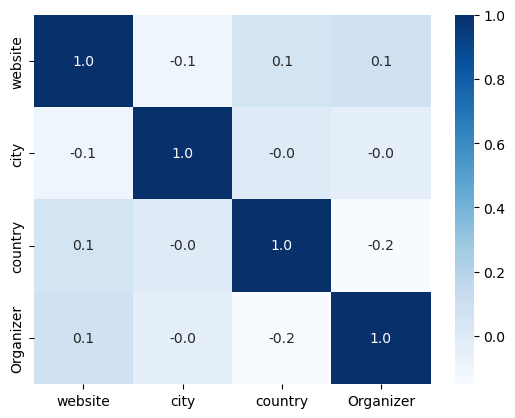

In [46]:
sns.heatmap(data1.corr(), annot = True, cmap="Blues",fmt='.1f')
plt.show()

### Split x and y

In [38]:
x= data1.iloc[:,3:9].values

In [39]:
y= data1.iloc[:, 9].values

### Split x and y into training and testing sets

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### Implementing Logistic Regression

In [35]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [36]:
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
df2=pd.DataFrame(x_test)

### Predicting Year of the Event by using the Current Data

In [37]:
arr=np.array([[322,58,35,290,25,3],[237,36,21,60,16,9],[149,76,34,174,22,11],[367,57,46,378,30,2],[112,195,57,7,10,6]])
print("arr \n")
print(arr)
y_pred3 = logreg.predict(arr)
y_pred3

arr 

[[322  58  35 290  25   3]
 [237  36  21  60  16   9]
 [149  76  34 174  22  11]
 [367  57  46 378  30   2]
 [112 195  57   7  10   6]]


array(['2020', '2023', '2023', '2022', '2023'], dtype=object)

## Conclusion

#### Here we got the year where the event occurs, and it is obtained by using the Machine Learning Algorithm Logistic Regression